In [1]:
# Imports

In [88]:
# Setting up pyplot runtime configuration

from matplotlib.ticker import MaxNLocator

SMALL = 14
MEDIUM = 16
LARGE = 20
THICK = 4
THIN = 3
ONE_TIMES_ONE = (9,8)
TWO_TIMES_ONE = (20,8)
TWO_TIMES_TWO = (20,15)
OPACITY = .25


plt.style.context('fivethirtyeight')
plt.rc('axes', facecolor='#E6E6E6', edgecolor='black', axisbelow=True, grid=True)
plt.rc('grid', color='white', linestyle='solid')
plt.rc('lines', linewidth=THICK)

plt.rc('font', size=MEDIUM, weight='bold')          # default text sizes
plt.rc('axes', titlesize=MEDIUM)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM)    # legend fontsize
plt.rc('figure', titlesize=LARGE)  # fontsize of the figure title

COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
N = 2**(2*2)

def beta(T):
    return 1/T

def partition(T):
    return 12 + 4*np.cosh(8*beta(T))
    #return 12 + 2*np.exp(-8*beta(T)) + 2*np.exp(8*beta(T))

def expE(T):
    return -32/partition(T)*np.sinh(8*beta(T))

def varE(T):
    return 256/partition(T)*np.cosh(8*beta(T)) - (expE(T))**2

def expMabs(T):
    return 8/partition(T)*(np.exp(8*beta(T)) + 2)

def varMabs(T):
    return 32/partition(T)*(np.exp(8*beta(T)) + 1) - (expMabs(T))**2

def heat_capacity(T):
    return varE(T)/T**2

def susceptibility(T):
    return varMabs(T)/T

In [4]:
T = np.linspace(.5,5,1000)

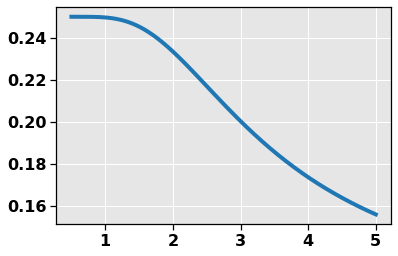

In [5]:
plt.plot(T, expMabs(T)/N)

E=-1.99598208593669, M=0.9986607327485997, cV=0.032082331864287994, chi=0.004010739516227435


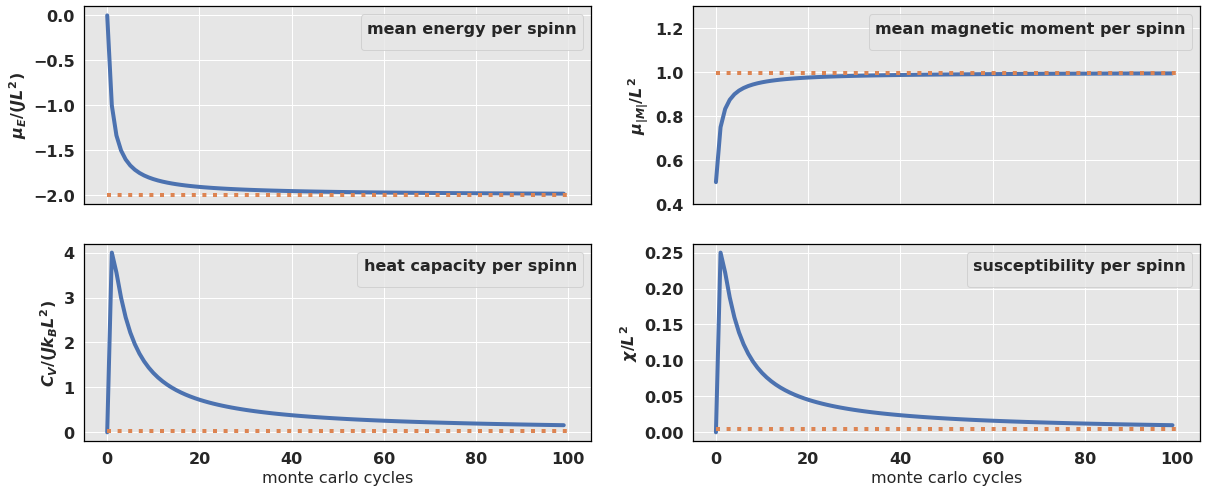

In [110]:
T = 1.0
E = expE(T)/4
M = expMabs(T)/4
cV = heat_capacity(T)/4
chi = susceptibility(T)/4
print(f'E={E}, M={M}, cV={cV}, chi={chi}')

df = pd.read_csv("./2x2/2x2.csv", comment='#')

cycles = int(df['c'].iloc[-1] + 1)
c = np.linspace(0,cycles)

fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=TWO_TIMES_ONE)
ax = axes[0,0]
df.plot(x='c', y='E', ax=ax)
ax.plot(c, E+0*c, ':')
ax.legend([], title='mean energy per spinn', title_fontsize=MEDIUM)
ax.set_ylabel("$\mu_E/(JL^2)$")

ax = axes[0,1]
df.plot(x='c', y='Mabs', ax=ax)
ax.plot(c, M+0*c, ':')
ax.legend([], title='mean magnetic moment per spinn', title_fontsize=MEDIUM)
ax.set_ylabel("$\mu_{|M|}/L^2$")
ax.set_ylim(.4,1.3)

ax = axes[1,0]
df.plot(x='c', y='CV', ax=ax)
ax.plot(c, cV+0*c, ':')
ax.legend([], title='heat capacity per spinn', title_fontsize=MEDIUM)
ax.set_xlabel("monte carlo cycles")
ax.set_ylabel("$C_V/(Jk_BL^2)$")

ax = axes[1,1]
df.plot(x='c', y='Chi', ax=ax)
ax.plot(c, chi+0*c, ':')
ax.legend([], title='susceptibility per spinn', title_fontsize=MEDIUM)
ax.set_xlabel("monte carlo cycles")
ax.set_ylabel("$\chi/L^2$")

plt.show()

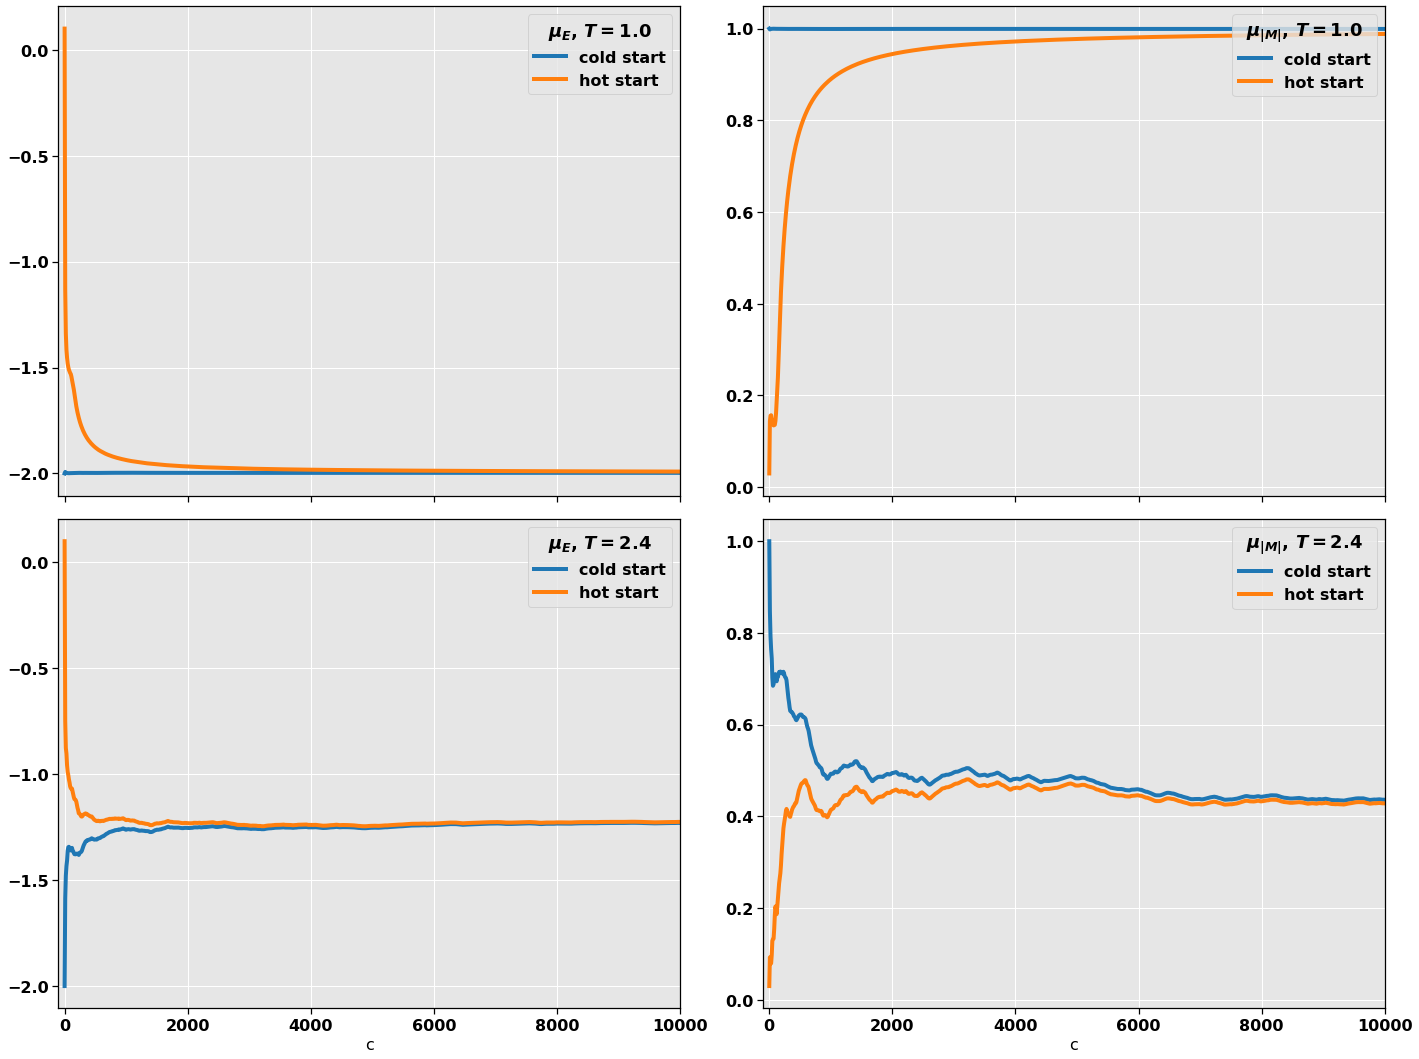

In [7]:
L20T1S0 = pd.read_csv("./20x20-hot-cold-start/L20T1S0.csv", comment='#')
L20T1S1 = pd.read_csv("./20x20-hot-cold-start/L20T1S1.csv", comment='#')

L20T24S0 = pd.read_csv("./20x20-hot-cold-start/L20T24S0.csv", comment='#')
L20T24S1 = pd.read_csv("./20x20-hot-cold-start/L20T24S1.csv", comment='#')

e_ylim = (-2.2,.5)
m_ylim = (-.1,1.5)
xlim = (-100,10000)

fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=TWO_TIMES_TWO)
ax = axes[0,0]
L20T1S0.plot(x='c', y='E', ax=ax, label='cold start')
L20T1S1.plot(x='c', y='E', ax=ax, label='hot start')
#ax.set_ylim(*e_ylim)
ax.legend(loc='upper right', title='$\mu_E$, $T=1.0$')

ax = axes[1,0]
L20T24S0.plot(x='c', y='E', ax=ax, label='cold start')
L20T24S1.plot(x='c', y='E', ax=ax, label='hot start')
#ax.set_ylim(*e_ylim)
ax.legend(loc='upper right', title='$\mu_E$, $T=2.4$')


ax = axes[0,1]
L20T1S0.plot(x='c', y='Mabs', ax=ax, label='cold start')
L20T1S1.plot(x='c', y='Mabs', ax=ax, label='hot start')
#ax.set_ylim(*e_ylim)
ax.legend(loc='upper right', title='$\mu_{|M|}$, $T=1.0$')

ax = axes[1,1]
L20T24S0.plot(x='c', y='Mabs', ax=ax, label='cold start')
L20T24S1.plot(x='c', y='Mabs', ax=ax, label='hot start')
#ax.set_ylim(*e_ylim)
ax.legend(loc='upper right', title='$\mu_{|M|}$, $T=2.4$')

ax.set_xlim(*xlim)
plt.tight_layout()
plt.show()

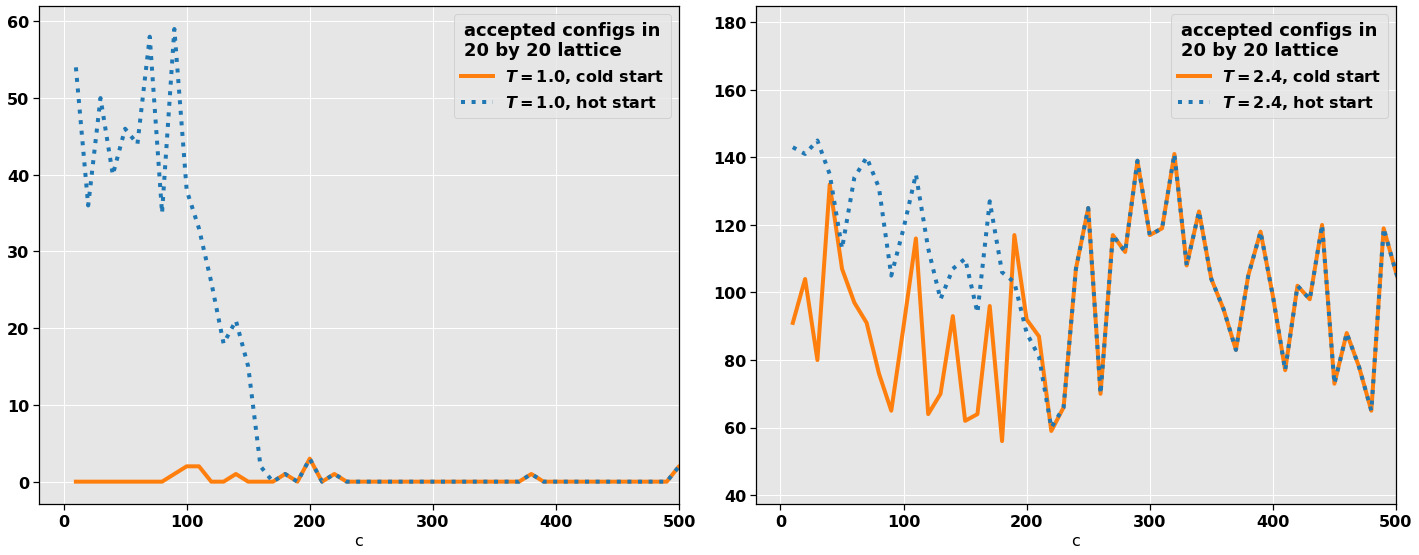

In [50]:
L20T1S0 = pd.read_csv("./20x20-hot-cold-start/L20T1S0.csv", comment='#')
L20T1S1 = pd.read_csv("./20x20-hot-cold-start/L20T1S1.csv", comment='#')
L20T24S0 = pd.read_csv("./20x20-hot-cold-start/L20T24S0.csv", comment='#')
L20T24S1 = pd.read_csv("./20x20-hot-cold-start/L20T24S1.csv", comment='#')

fig, axes = plt.subplots(ncols=2, nrows=1, sharex=True, figsize=TWO_TIMES_ONE)
ax = axes[0]
L20T1S0.iloc[1:].plot(x='c', y='accs', ax=ax, label='$T=1.0$, cold start', color=COLORS[1])
L20T1S1.iloc[1:].plot(x='c', y='accs', ax=ax, label='$T=1.0$, hot start', color=COLORS[0], style=':')
#ax.set_ylim(*e_ylim)
ax.legend(loc='upper right', title='accepted configs in\n20 by 20 lattice')


ax = axes[1]
L20T24S0.iloc[1:].plot(x='c', y='accs', ax=ax, label='$T=2.4$, cold start', color=COLORS[1])
L20T24S1.iloc[1:].plot(x='c', y='accs', ax=ax, label='$T=2.4$, hot start', color=COLORS[0], style=':')
#ax.set_ylim(*e_ylim)
ax.set_xlim(-20,500)
ax.legend(loc='upper right', title='accepted configs in\n20 by 20 lattice')


plt.tight_layout()
plt.show()

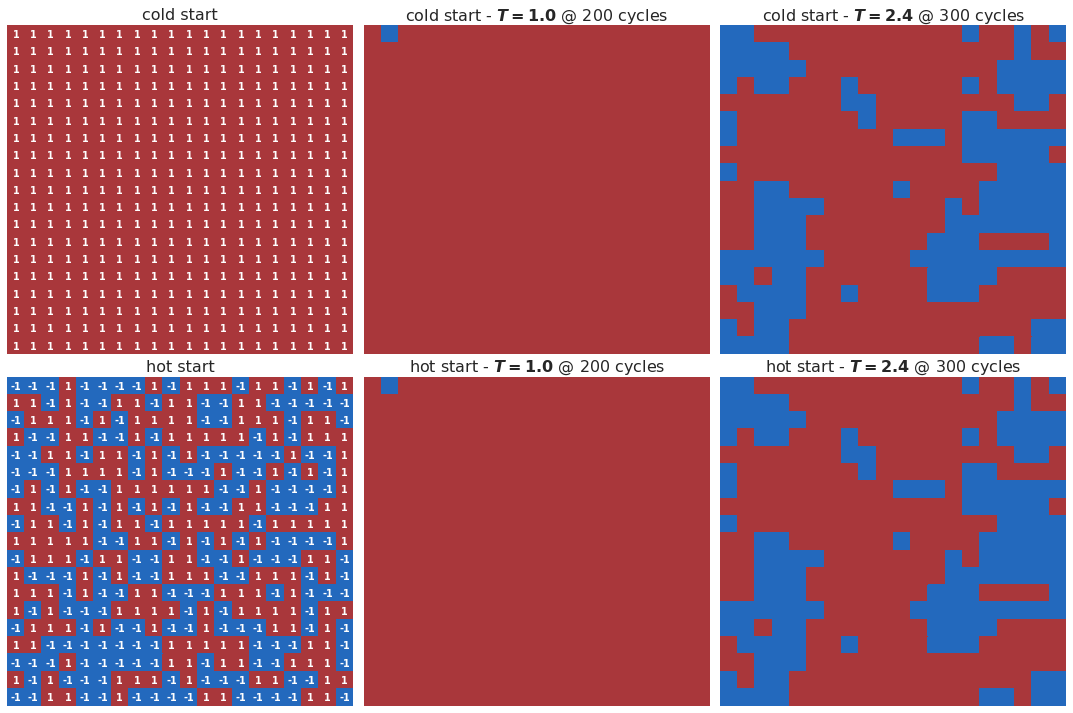

In [86]:
fig, axes = plt.subplots(ncols=3, nrows=2, sharex=True, sharey=True, figsize=(15,10))

hot_init = pd.read_csv("./20x20-hot-cold-start/init_hot_plot.csv", comment='#').to_numpy()
cold_init = pd.read_csv("./20x20-hot-cold-start/init_cold_plot.csv", comment='#').to_numpy()

hot1 = pd.read_csv("./20x20-hot-cold-start/1hot_plot.csv", comment='#').to_numpy()
cold1 = pd.read_csv("./20x20-hot-cold-start/1cold_plot.csv", comment='#').to_numpy()

hot24 = pd.read_csv("./20x20-hot-cold-start/24hot_plot.csv", comment='#').to_numpy()
cold24 = pd.read_csv("./20x20-hot-cold-start/24cold_plot.csv", comment='#').to_numpy()

vmin, vmax = -1, 1

ax = axes[0,0]
ax.set_title('cold start', fontsize=MEDIUM)
sns.heatmap(cold_init, annot=True, ax=ax, cmap='vlag', cbar=None, vmin=vmin, vmax=vmax)
sns.set(font_scale=.8)
ax.tick_params(left=False, bottom=False) 
ax.set_aspect('equal')

ax = axes[1,0]
ax.set_title('hot start', fontsize=MEDIUM)
sns.heatmap(hot_init, annot=True, ax=ax, cmap='vlag', cbar=None, vmin=vmin, vmax=vmax)
sns.set(font_scale=.8)
ax.tick_params(left=False, bottom=False) 
ax.set_aspect('equal')


ax = axes[0,1]
ax.set_title('cold start - $T=1.0$ @ 200 cycles', fontsize=MEDIUM)
sns.heatmap(cold1, annot=False, ax=ax, cmap='vlag', cbar=None, vmin=vmin, vmax=vmax)
ax.tick_params(left=False, bottom=False) 
ax.set_aspect('equal')

ax = axes[1,1]
ax.set_title('hot start - $T=1.0$ @ 200 cycles', fontsize=MEDIUM)
sns.heatmap(hot1, annot=False, ax=ax, cmap='vlag', cbar=None, vmin=vmin, vmax=vmax)
ax.tick_params(left=False, bottom=False) 
ax.set_aspect('equal')


ax = axes[0,2]
ax.set_title('cold start - $T=2.4$ @ 300 cycles', fontsize=MEDIUM)
sns.heatmap(cold24, annot=False, ax=ax, cmap='vlag', cbar=None, vmin=vmin, vmax=vmax)
ax.tick_params(left=False, bottom=False) 
ax.set_aspect('equal')

ax = axes[1,2]
ax.set_title('hot start - $T=2.4$ @ 300 cycles', fontsize=MEDIUM)
sns.heatmap(hot24, annot=False, ax=ax, cmap='vlag', cbar=None, vmin=vmin, vmax=vmax)
ax.tick_params(left=False, bottom=False) 
ax.set_aspect('equal')

ax.set_xticklabels([])
ax.set_yticklabels([])

plt.tight_layout()
plt.show()

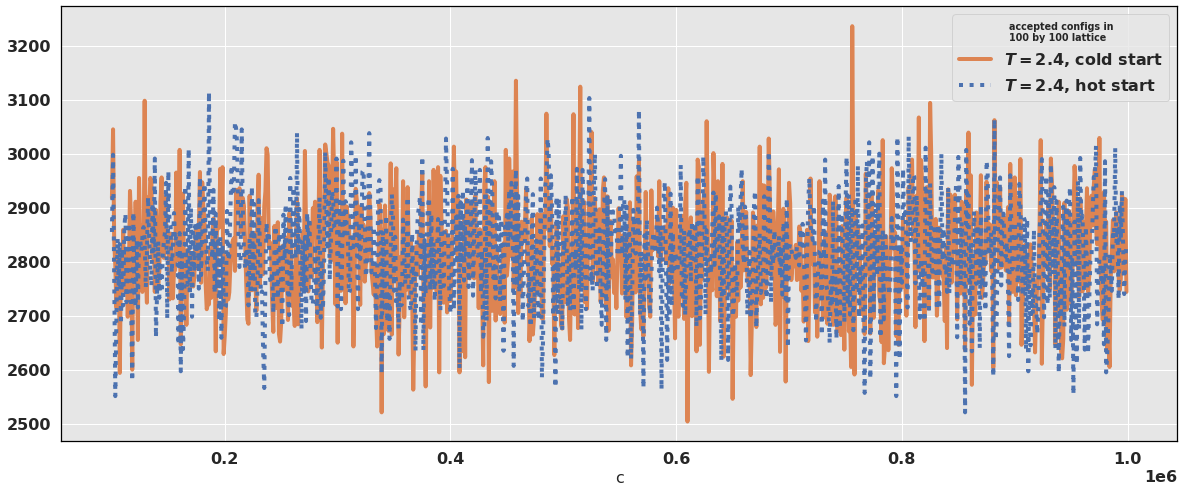

In [153]:
hot_vals = pd.read_csv("./100x100-hot-cold-start/hot_vals.csv", comment='#')
cold_vals = pd.read_csv("./100x100-hot-cold-start/cold_vals.csv", comment='#')

fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, figsize=TWO_TIMES_ONE)
ax = axes
cold_vals.iloc[100:].plot(x='c', y='accs', ax=ax, label='$T=2.4$, cold start', color=COLORS[1])
hot_vals.iloc[100:].plot(x='c', y='accs', ax=ax, label='$T=2.4$, hot start', color=COLORS[0], style=':')
#ax.set_ylim(*e_ylim)
ax.legend(loc='upper right', title='accepted configs in\n100 by 100 lattice')

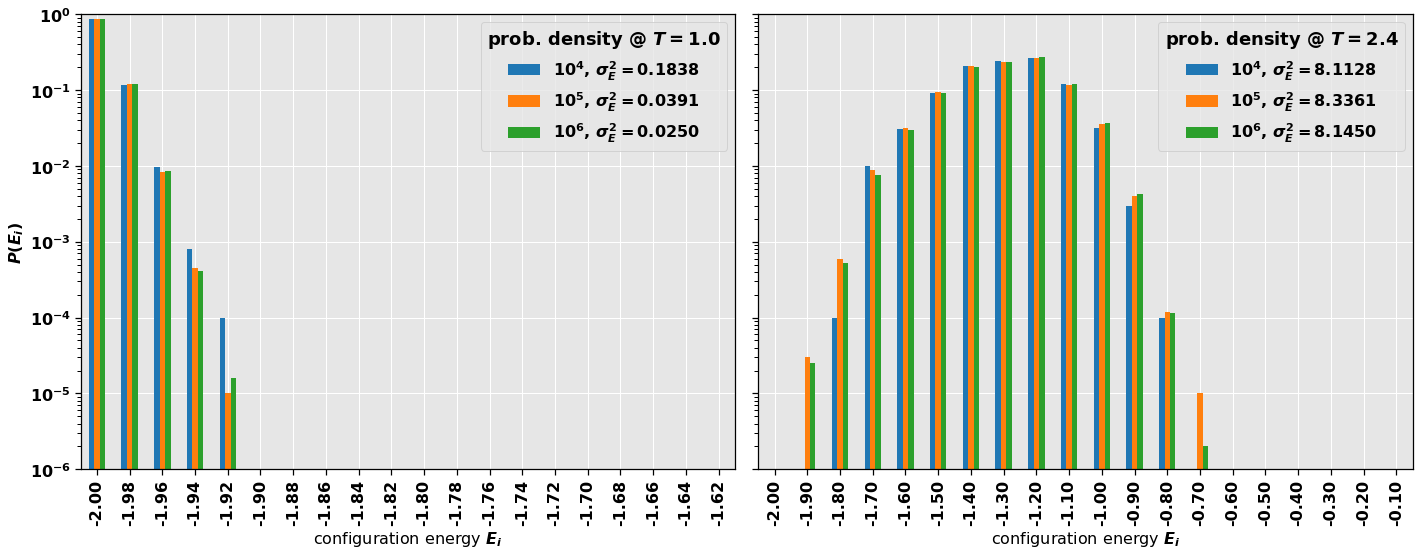

In [44]:
T1C4 = pd.read_csv('./probability-distribution/T1C4.csv', comment='#')
T1C5 = pd.read_csv('./probability-distribution/T1C5.csv', comment='#')
T1C6 = pd.read_csv('./probability-distribution/T1C6.csv', comment='#')
df1 = DataFrame()
df1['E'] = T1C4['E']
df1['$10^4$'] = T1C4['p']
df1['$10^5$'] = T1C5['p']
df1['$10^6$'] = T1C6['p']

T24C4 = pd.read_csv('./probability-distribution/T24C4.csv', comment='#')
T24C5 = pd.read_csv('./probability-distribution/T24C5.csv', comment='#')
T24C6 = pd.read_csv('./probability-distribution/T24C6.csv', comment='#')
df24 = DataFrame()
df24['E'] = T24C4['E']
df24['$10^4$'] = T24C4['p']
df24['$10^5$'] = T24C5['p']
df24['$10^6$'] = T24C6['p']

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, figsize=TWO_TIMES_ONE)

ax = axes[0]
df1.iloc[:20].plot(x='E', ax=ax, kind='bar', rot=90, fontsize=MEDIUM)
ax.set_xticklabels([f'{v:.2f}' for v in df1['E'].iloc[:20]])
ax.set_xlabel('configuration energy $E_i$')
ax.legend(['$10^4$, $\sigma^2_E=0.1838$', '$10^5$, $\sigma^2_E=0.0391$', '$10^6$, $\sigma^2_E=0.0250$', ], title='prob. density @ $T=1.0$', loc='upper right', fontsize=MEDIUM)

ax = axes[1]
df24.plot(x='E', ax=ax, kind='bar', rot=90, fontsize=MEDIUM)
ax.set_xticklabels([f'{v:.2f}' for v in df24['E']])
ax.set_xlabel('configuration energy $E_i$')
ax.legend(['$10^4$, $\sigma^2_E=8.1128$', '$10^5$, $\sigma^2_E=8.3361$', '$10^6$, $\sigma^2_E=8.1450$', ], title='prob. density @ $T=2.4$', loc='upper right', fontsize=MEDIUM)

ax = axes[0]
ax.set_ylim(1e-6,1)
ax.set_yscale('log')
ax.set_ylabel(r'$P(E_i)$', fontsize=MEDIUM)

plt.tight_layout()
plt.show()

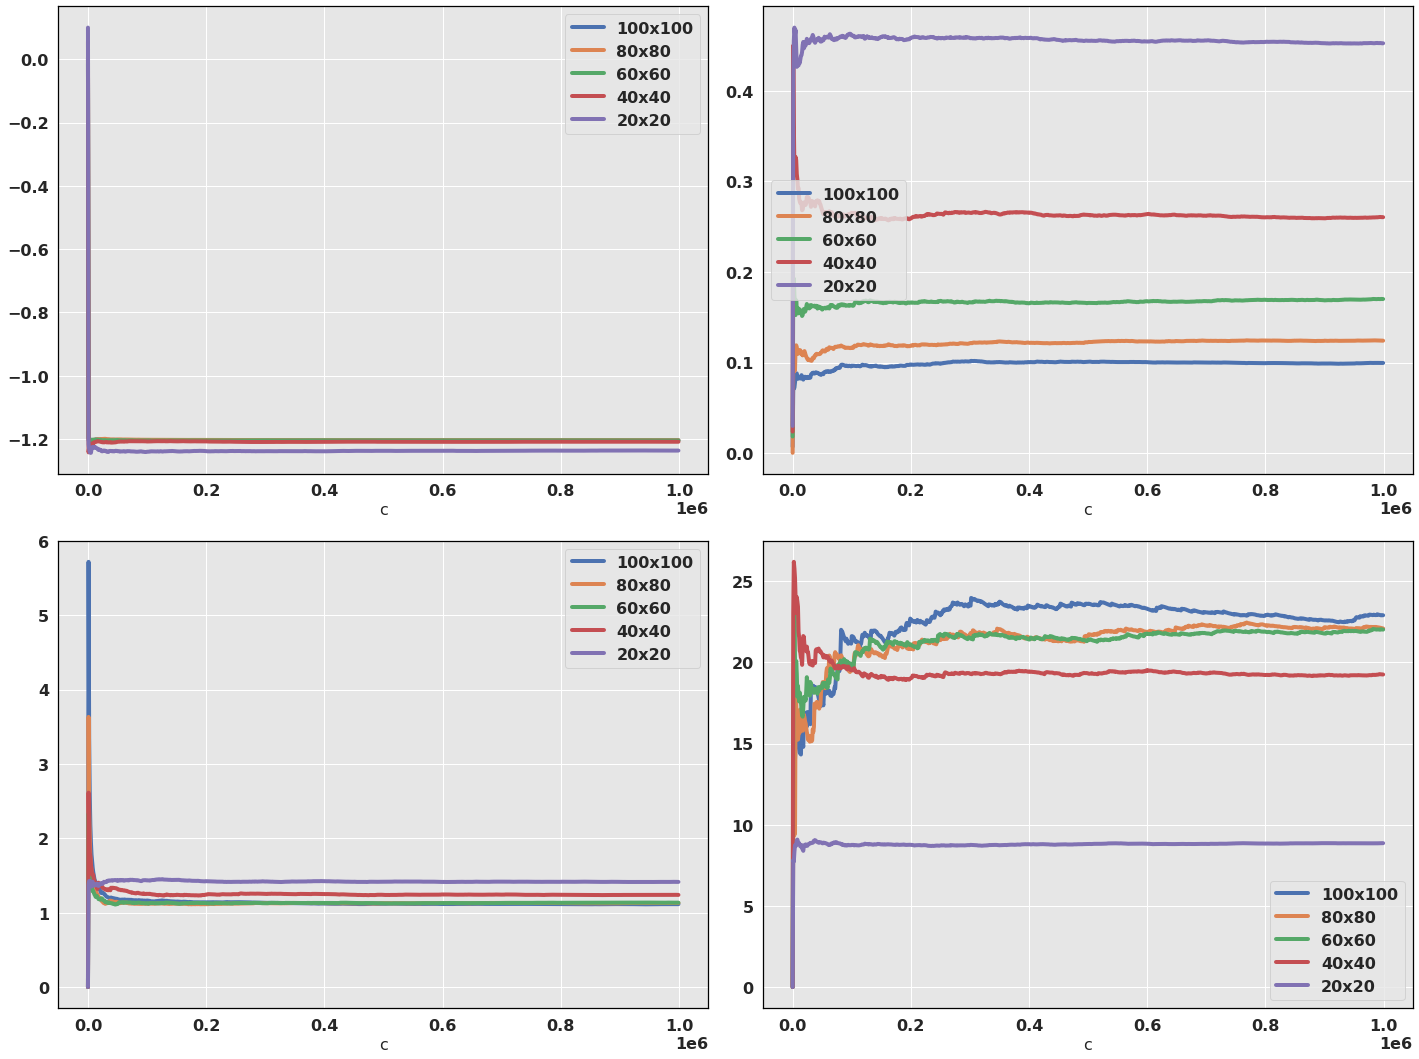

In [115]:
df100 = pd.read_csv("./1e6-runs/100x100.csv", comment='#')
df80 = pd.read_csv("./1e6-runs/80x80.csv", comment='#')
df60 = pd.read_csv("./1e6-runs/60x60.csv", comment='#')
df40 = pd.read_csv("./1e6-runs/40x40.csv", comment='#')
df20 = pd.read_csv("./1e6-runs/20x20.csv", comment='#')

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=TWO_TIMES_TWO)
ax = axes[0,0]
df100.plot(x='c', y='E', ax=ax, label='100x100')
df80.plot(x='c', y='E', ax=ax, label='80x80')
df60.plot(x='c', y='E', ax=ax, label='60x60')
df40.plot(x='c', y='E', ax=ax, label='40x40')
df20.plot(x='c', y='E', ax=ax, label='20x20')

ax = axes[0,1]
df100.plot(x='c', y='Mabs', ax=ax, label='100x100')
df80.plot(x='c', y='Mabs', ax=ax, label='80x80')
df60.plot(x='c', y='Mabs', ax=ax, label='60x60')
df40.plot(x='c', y='Mabs', ax=ax, label='40x40')
df20.plot(x='c', y='Mabs', ax=ax, label='20x20')


ax = axes[1,0]
df100.plot(x='c', y='CV', ax=ax, label='100x100')
df80.plot(x='c', y='CV', ax=ax, label='80x80')
df60.plot(x='c', y='CV', ax=ax, label='60x60')
df40.plot(x='c', y='CV', ax=ax, label='40x40')
df20.plot(x='c', y='CV', ax=ax, label='20x20')

ax = axes[1,1]
df100.plot(x='c', y='Chi', ax=ax, label='100x100')
df80.plot(x='c', y='Chi', ax=ax, label='80x80')
df60.plot(x='c', y='Chi', ax=ax, label='60x60')
df40.plot(x='c', y='Chi', ax=ax, label='40x40')
df20.plot(x='c', y='Chi', ax=ax, label='20x20')

plt.tight_layout()
plt.show()

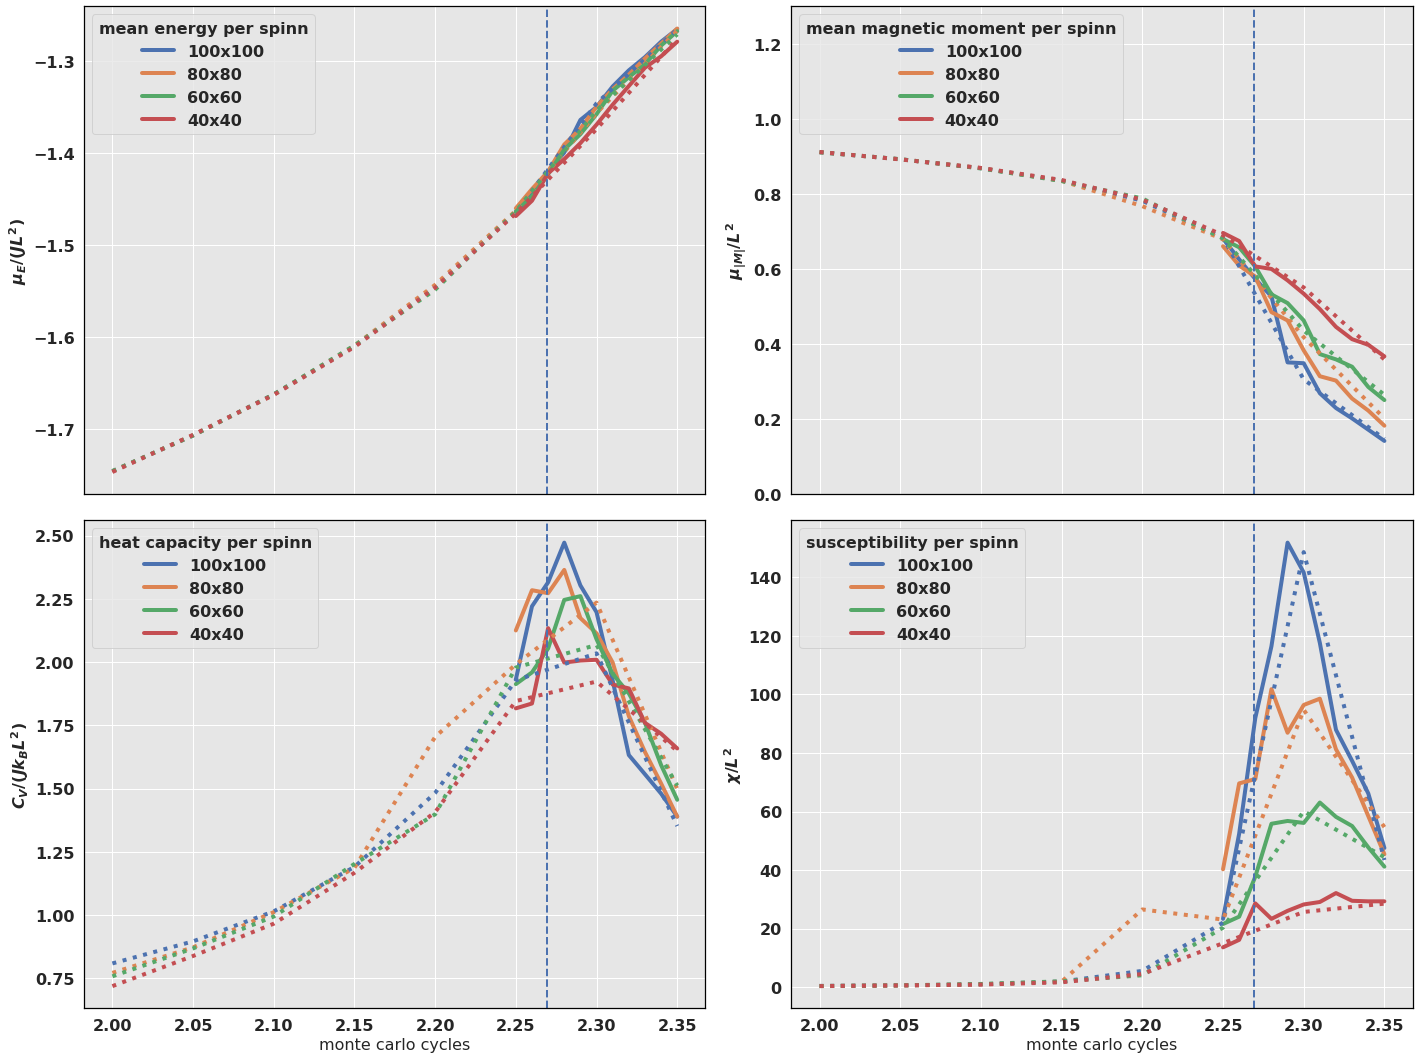

In [174]:
df40_01 = pd.read_csv("./critical-temperature/iter-01_40.csv", comment='#')
df60_01 = pd.read_csv("./critical-temperature/iter-01_60.csv", comment='#')
df80_01 = pd.read_csv("./critical-temperature/iter-01_80.csv", comment='#')
df100_01 = pd.read_csv("./critical-temperature/iter-01_100.csv", comment='#')

df40_02 = pd.read_csv("./critical-temperature/iter-02_40.csv", comment='#')
df60_02 = pd.read_csv("./critical-temperature/iter-02_60.csv", comment='#')
df80_02 = pd.read_csv("./critical-temperature/iter-02_80.csv", comment='#')
df100_02 = pd.read_csv("./critical-temperature/iter-02_100.csv", comment='#')

dfs_01 = (df100_01, df80_01, df60_01, df40_01)
dfs_02 = (df100_02, df80_02, df60_02, df40_02)
names = ('100x100', '80x80', '60x60', '40x40')

fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=TWO_TIMES_TWO)

for i, (df, name) in enumerate(zip(dfs_02, names)):
    ax = axes[0,0]
    df.plot(x='T', y='E', ax=ax, color=COLORS[i])
    ax = axes[0,1]
    df.plot(x='T', y='Mabs', ax=ax, color=COLORS[i])
    ax = axes[1,0]
    df.plot(x='T', y='CV', ax=ax, color=COLORS[i])
    ax = axes[1,1]
    df.plot(x='T', y='Chi', ax=ax, color=COLORS[i])

for i, (df, name) in enumerate(zip(dfs_01, names)):
    ax = axes[0,0]
    df.plot(x='T', y='E', ax=ax, style=':', color=COLORS[i])
    ax = axes[0,1]
    df.plot(x='T', y='Mabs', ax=ax, style=':', color=COLORS[i])
    ax = axes[1,0]
    df.plot(x='T', y='CV', ax=ax, style=':', color=COLORS[i])
    ax = axes[1,1]
    df.plot(x='T', y='Chi', ax=ax, style=':', color=COLORS[i])
    
    
ax = axes[0,0]
ax.legend(names, title='mean energy per spinn', title_fontsize=MEDIUM)
ax.set_ylabel("$\mu_E/(JL^2)$")
ax.axvline(x=2.269, linestyle='--', linewidth=2)

ax = axes[0,1]
ax.legend(names, title='mean magnetic moment per spinn', title_fontsize=MEDIUM)
ax.set_ylabel("$\mu_{|M|}/L^2$")
ax.set_ylim(0,1.3)
ax.axvline(x=2.269, linestyle='--', linewidth=2)

ax = axes[1,0]
ax.legend(names, title='heat capacity per spinn', title_fontsize=MEDIUM)
ax.set_xlabel("monte carlo cycles")
ax.set_ylabel("$C_V/(Jk_BL^2)$")
ax.axvline(x=2.269, linestyle='--', linewidth=2)

ax = axes[1,1]
ax.legend(names, title='susceptibility per spinn', title_fontsize=MEDIUM)
ax.set_xlabel("monte carlo cycles")
ax.set_ylabel("$\chi/L^2$")
ax.axvline(x=2.269, linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

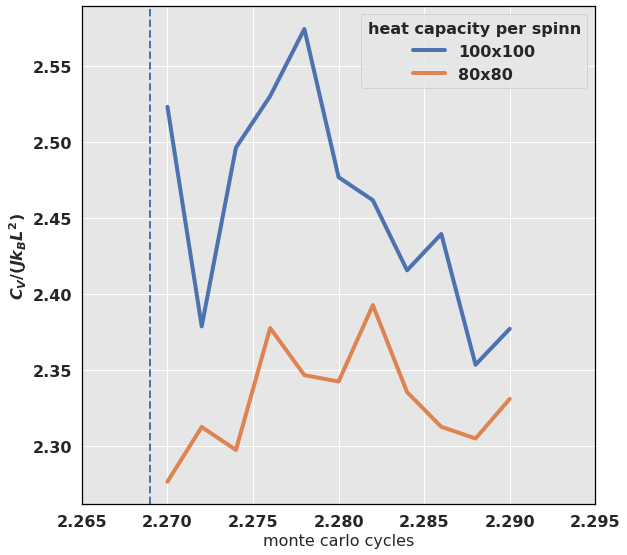

2.2620000000000005

In [177]:
df80_03 = pd.read_csv("./critical-temperature/iter-03_80.csv", comment='#')
df100_03 = pd.read_csv("./critical-temperature/iter-03_100.csv", comment='#')

names = ('100x100', '80x80')

fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, figsize=ONE_TIMES_ONE)

ax = axes
df100_03.plot(x='T', y='CV', ax=ax, color=COLORS[0])
df80_03.plot(x='T', y='CV', ax=ax, color=COLORS[1])

ax.legend(names, title='heat capacity per spinn', title_fontsize=MEDIUM)
ax.set_xlabel("monte carlo cycles")
ax.set_ylabel("$C_V/(Jk_BL^2)$")
ax.axvline(x=2.269, linestyle='--', linewidth=2)
ax.set_xlim(2.265,2.295)

plt.tight_layout()
plt.show()

(100*2.278 - 80*2.282)/(100 - 80)

In [162]:
df80_03 = pd.read_csv("./critical-temperature/iter-03_80.csv", comment='#')
df100_03 = pd.read_csv("./critical-temperature/iter-03_100.csv", comment='#')

df80_03, df100_03

(        T         E        CV      Mabs         Chi         M
 0   2.270 -1.421752  2.276680  0.589581   63.623359  0.117264
 1   2.272 -1.416491  2.312605  0.574369   68.666424  0.012389
 2   2.274 -1.411906  2.297521  0.565318   67.697361 -0.037719
 3   2.276 -1.404467  2.377696  0.530619   89.721905 -0.019995
 4   2.278 -1.401817  2.346705  0.532378   84.448400 -0.135105
 5   2.280 -1.397279  2.342496  0.518712   91.337831  0.051861
 6   2.282 -1.392372  2.392734  0.504864   92.709605  0.002509
 7   2.284 -1.387577  2.335545  0.490674   96.584230  0.091769
 8   2.286 -1.383578  2.312736  0.478423   98.496042  0.057479
 9   2.288 -1.378437  2.305046  0.469345   93.508365 -0.021421
 10  2.290 -1.375171  2.331075  0.456407  105.177741 -0.146155,
         T         E        CV      Mabs         Chi         M
 0   2.270 -1.417595  2.523071  0.550336  127.383424 -0.169162
 1   2.272 -1.414798  2.378788  0.560477   91.373558 -0.040682
 2   2.274 -1.409462  2.496225  0.536795  119.020110 -